In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data = {
    'Year' : [2021, 2022, 2023],
    'Mortality Rate (%)': [11.4, 11.2, 10.9],
    'Growth rate of Mortality': [-1.680,-1.700,-1.730],
    'Healthcare Worker Density (per 1,000)': [5.02, 4.90, 4.40],
    'Healthcare Access Percentage (%)': [30,38,43.3],
    'No Access to Healthcare (%)': [44,39,32],
    'Traditional Care (%)': [10,12,10]
}
df = pd.DataFrame(data)


In [3]:
print(df)

   Year  Mortality Rate (%)  Growth rate of Mortality  \
0  2021                11.4                     -1.68   
1  2022                11.2                     -1.70   
2  2023                10.9                     -1.73   

   Healthcare Worker Density (per 1,000)  Healthcare Access Percentage (%)  \
0                                   5.02                              30.0   
1                                   4.90                              38.0   
2                                   4.40                              43.3   

   No Access to Healthcare (%)  Traditional Care (%)  
0                           44                    10  
1                           39                    12  
2                           32                    10  


C:\anacondaaaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


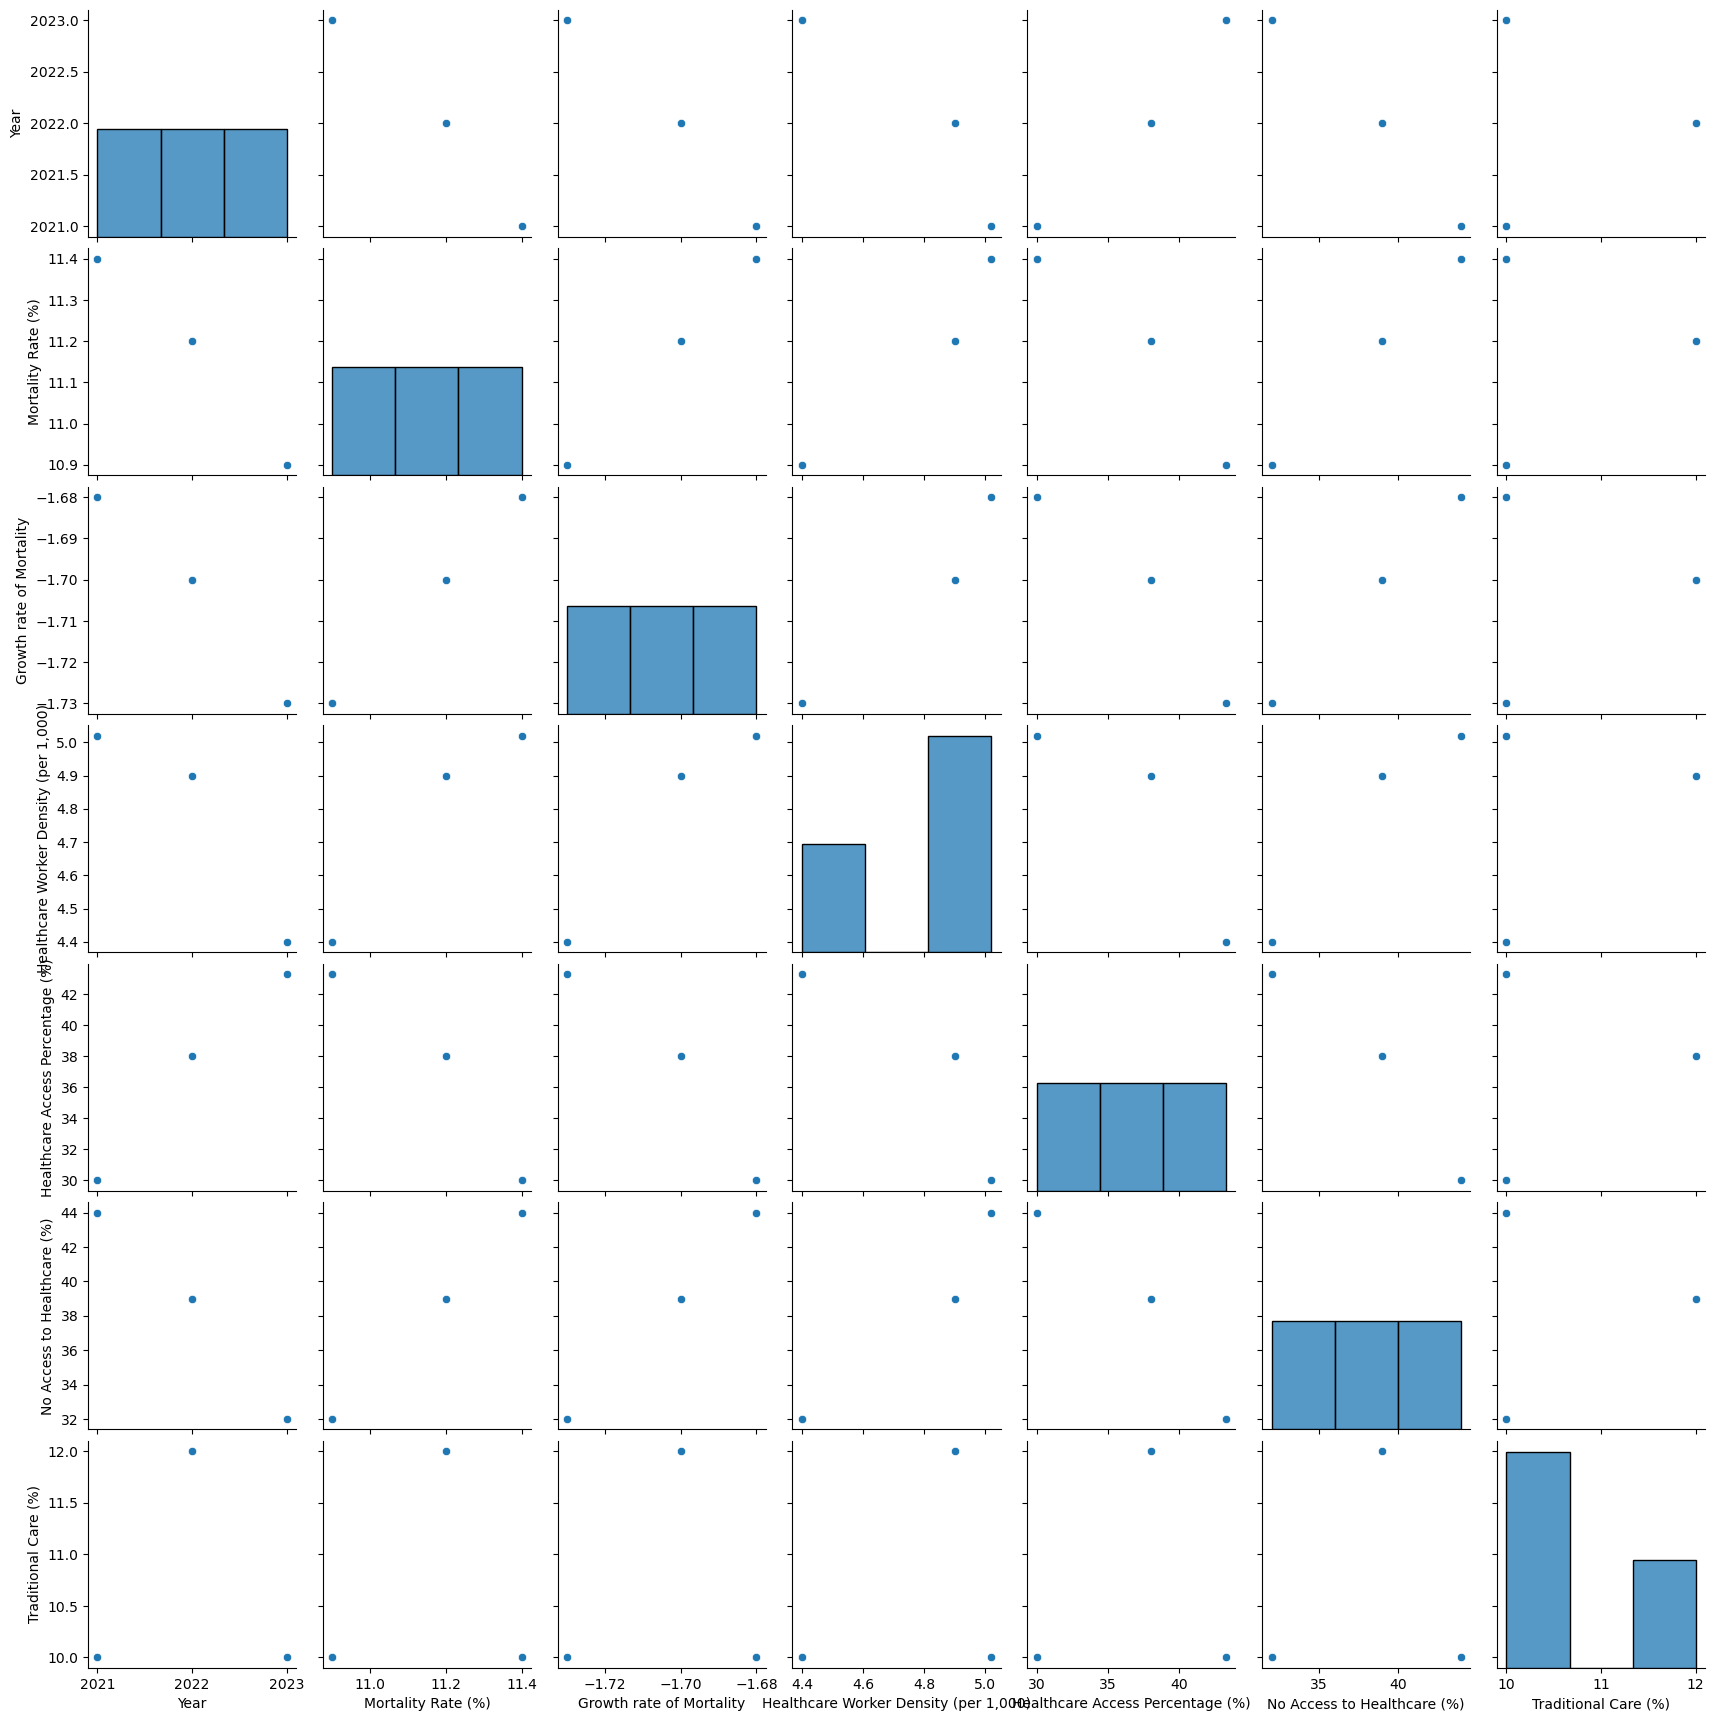

In [4]:
sns.pairplot(df)
plt.show()

<Axes: >

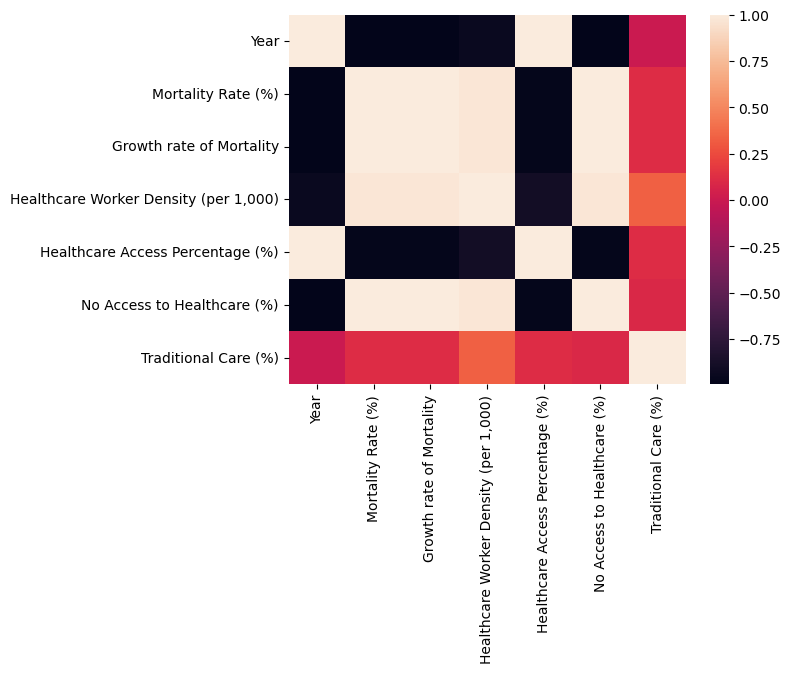

In [5]:
sns.heatmap(df.corr())

In [6]:
df.describe()

,Year,Mortality Rate (%),Growth rate of Mortality,"Healthcare Worker Density (per 1,000)",Healthcare Access Percentage (%),No Access to Healthcare (%),Traditional Care (%)
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2022.0,11.166667,-1.703333,4.773333,37.100000,38.333333,10.666667
std,1.0,0.251661,0.025166,0.328836,6.695521,6.027714,1.154701
min,2021.0,10.900000,-1.730000,4.400000,30.000000,32.000000,10.000000
25%,2021.5,11.050000,-1.715000,4.650000,34.000000,35.500000,10.000000
50%,2022.0,11.200000,-1.700000,4.900000,38.000000,39.000000,10.000000
75%,2022.5,11.300000,-1.690000,4.960000,40.650000,41.500000,11.000000
max,2023.0,11.400000,-1.680000,5.020000,43.300000,44.000000,12.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   3 non-null      int64  
 1   Mortality Rate (%)                     3 non-null      float64
 2   Growth rate of Mortality               3 non-null      float64
 3   Healthcare Worker Density (per 1,000)  3 non-null      float64
 4   Healthcare Access Percentage (%)       3 non-null      float64
 5   No Access to Healthcare (%)            3 non-null      int64  
 6   Traditional Care (%)                   3 non-null      int64  
dtypes: float64(4), int64(3)
memory usage: 300.0 bytes


In [8]:
df.drop(columns='Year', axis=1, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix


In [10]:
X = df.drop(columns=['Mortality Rate (%)', 'Growth rate of Mortality'], axis=1)
Y = df['Mortality Rate (%)']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [14]:
LR = LinearRegression()

In [15]:
LR.fit(x_train_scaled, Y_train)

LinearRegression()

In [16]:
y_pred = LR.predict(x_test_scaled)
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0014854600694442072


In [17]:
 mean_absolute_error(Y_test, y_pred)

0.03854166666666359

In [18]:
datas = np.array([[7,70,10,20]])
predicted_MR = LR.predict(datas)

In [19]:
print(f'Predicted Mortality Rate for 80% Access to Healthcare: {predicted_MR[0]}')

Predicted Mortality Rate for 80% Access to Healthcare: 9.47499999999999


In [20]:
predictions = pd.DataFrame(x_test_scaled, columns=X.columns)
predictions['Predicted Mortality Rate (%)'] = y_pred
predictions.to_csv('predictions.csv', index=False)

In [21]:
import pickle as pkl

In [22]:
filename = 'df.pkl'
pkl.dump(LR, open(filename, 'wb'))